# **Do Connections Really Matter?** 

### Group Members: Winston Cai - , Ricky Jung - , Chris Spencer - everything up until interpetation and conclusion cell, Carolyn Zhou - 

## Abstract (5 points)
Although this section comes first, you'll write it last.  It should be a ~150 word summary of your project.  1/3rd of the abstract should provide background, 1/3rd should explain what you did, and 1/3rd should explain what you learned.

## Project Background (5 points)
When analyzing potential causes and solutions to class mobility in America, it is important to take into cosideration who they are surrounded by and who they know. Our goal is to discover how much this may impact an indivdual's future. More specifically, we want to see how this starts to play out in California colleges, as most people start meeting real professional connections with their peers starting then. Additionally, many colleges have resources, some of which may have superior ones depending on the funding, reputation(Stanford vs CCC), and other factors. 

## Project Objective (5 points)
The purpose of this project is to discover if having connections to higher-income individuals (friends, family, etc) can increase their socioeconomic status.

## Data Description ( 5 points)
Sourced from Meta, formerly Facebook, this data was collected with aims to quantify connections to individuals of high socioeconomic standing. Each data point represents a university.
![](attachment:d6a906b1-1227-4e11-84ab-85051b91cd47.png)

## Data Clenaing (5 points)
In this section you will walk through the data cleaning and merging process.  Explain how you make decisions to clean and merge the data.  Explain how you convince yourself that the data don't contain problems that will limit your ability to produce a meaningful analysis from them.   

In [15]:
# Run this cell to set up your notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import warnings
warnings.filterwarnings('ignore')

In [16]:
# Load US college data
us_college_data = pd.read_csv("social_capital_college.csv")
county_data = pd.read_csv("social_capital_county.csv")

In [19]:
# Merge datasets
merged = us_college_data.merge(county_data, on="county")
merged.head()

,college,college_name,zip,county,mean_students_per_cohort,ec_own_ses_college,ec_own_ses_se_college,ec_parent_ses_college,ec_parent_ses_se_college,ec_high_own_ses_college,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
0,100200,Alabama A & M University,35762,1089,943.666667,0.85678,0.02233,0.67629,0.03241,1.12202,...,1.15587,1.35896,0.05709,-0.19939,0.04294,-0.05810,0.09810,0.98902,0.06791,0.01661
1,103300,Oakwood University,35896,1089,NaN,1.47346,0.03065,1.11614,0.04679,1.53231,...,1.15587,1.35896,0.05709,-0.19939,0.04294,-0.05810,0.09810,0.98902,0.06791,0.01661
2,105500,University of Alabama in Huntsville,35899,1089,636.333333,1.41845,0.02850,1.34578,0.03505,1.56536,...,1.15587,1.35896,0.05709,-0.19939,0.04294,-0.05810,0.09810,0.98902,0.06791,0.01661
3,526000,J. F. Drake State Community and Technical College,35811,1089,NaN,NaN,NaN,NaN,NaN,NaN,...,1.15587,1.35896,0.05709,-0.19939,0.04294,-0.05810,0.09810,0.98902,0.06791,0.01661
4,100300,Faulkner University,36109,1101,227.666667,1.30964,0.04869,1.26671,0.05812,1.54639,...,0.79902,1.20654,0.16954,-0.19275,0.00818,-0.01049,0.10102,0.99729,0.02914,0.01851


In [20]:
# Create new df that only contains colleges in California
california_colleges = merged.query('county_name.str.contains("California")', engine='python')
california_colleges.head()

,college,college_name,zip,county,mean_students_per_cohort,ec_own_ses_college,ec_own_ses_se_college,ec_parent_ses_college,ec_parent_ses_se_college,ec_high_own_ses_college,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
100,111100,Allan Hancock College,93454,6083,1220.000000,1.13665,0.02534,1.00510,0.03605,1.42613,...,1.09167,1.27300,0.19312,-0.12118,0.0904,-0.10762,0.09342,0.98363,0.05093,0.01894
101,128500,Santa Barbara City College,93109,6083,1827.000000,1.44700,0.02539,1.15655,0.03681,1.71152,...,1.09167,1.27300,0.19312,-0.12118,0.0904,-0.10762,0.09342,0.98363,0.05093,0.01894
102,132000,University of California-Santa Barbara,93106,6083,3450.333333,1.80382,0.01471,1.39456,0.02122,1.88924,...,1.09167,1.27300,0.19312,-0.12118,0.0904,-0.10762,0.09342,0.98363,0.05093,0.01894
103,134100,Westmont College,93108,6083,296.666667,1.87857,0.02474,1.68845,0.03651,1.91260,...,1.09167,1.27300,0.19312,-0.12118,0.0904,-0.10762,0.09342,0.98363,0.05093,0.01894
104,111300,Antelope Valley College,93536,6037,1904.666667,1.01572,0.02544,0.94726,0.03566,1.25940,...,0.77687,1.18295,0.18278,-0.10729,0.0318,-0.07152,0.08176,0.94514,0.04692,0.01358


In [5]:
def college_type(data):
    if "University of California-" in data:
        return "UC"
    elif "California State University-" in data:
        return "CSU"
    elif "Community College" in data:
        return "CCC"
    return "Other"
    
california_colleges['college_type'] = california_colleges['college_name'].apply(college_type)

# **Clustering**
##### We will now dive into clustering methods! Unlike most ML techniques you are familiar with, such as regression and classification techniques such as decision trees, clustering is `unsupervised` ML protocol. This means that the algorithm, when deployed, will sort each new input into a cluster, even without it being placed into one. `K-means clustering` is the most popular and most utilized. For those of you familiar with runtime complexities of algorithms, K-means clustering has a linear, or O(n), runtime (there are some disagreements as to how true that is in certain cases, but it is mostly linear). To explain more simply, as the data set grows and more entries are inputted, the amount of time it takes for the algo to run increases in a linear fashion. Here is a quintessential, but really great graph to help visualize runtime complexities:
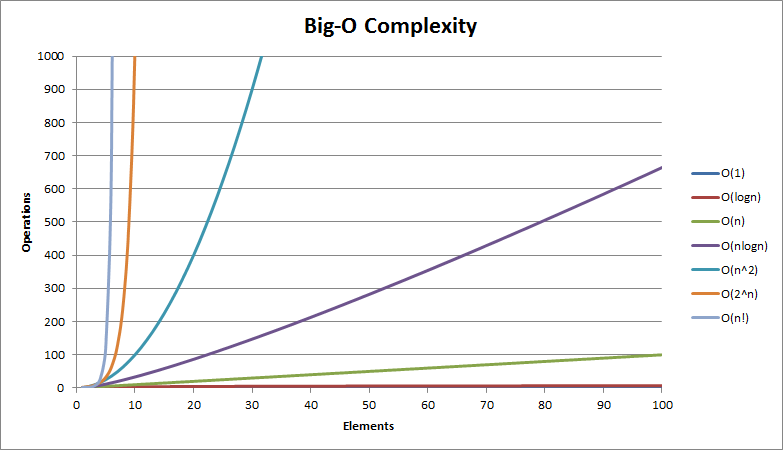

##### So how do we choose centers, or "cluster sites", as I like to call them? Here are the main steps:
1. "Randomly" choose K number of centers, or cluster sites
    -  I put randomly in quotes because there is a method, called the elbow method, that can provide a much closer value for k than an arbitrary number, but we won't worry about that for now.
2. Make each cluster site a different color
3. Points closest to a certain cluster site should be the same color.
    - We'll see how to do this more mathematically later>

## Exploratory Data Analysis (20 points)

<AxesSubplot:xlabel='ec_high_own_ses_college', ylabel='exposure_own_ses_college'>

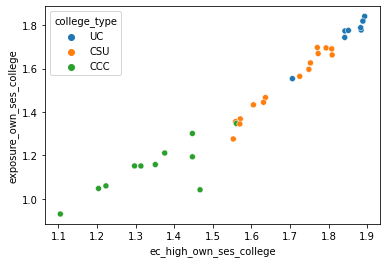

In [6]:
sns.scatterplot(data=california_colleges.query("college_type != 'Other'"),
                x='ec_high_own_ses_college',
                y='exposure_own_ses_college',
                hue='college_type')

##### As you can already see, there are groupings forming; however, you can also notice that some points are encroaching on areas that they may not belong to.

In [214]:
without_labels = california_colleges.drop(["college_type", "college_name"], axis=1).dropna()
without_labels

,college,zip,county,mean_students_per_cohort,ec_own_ses_college,ec_own_ses_se_college,ec_parent_ses_college,ec_parent_ses_se_college,ec_high_own_ses_college,ec_high_own_ses_se_college,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
100,111100,93454,6083,1220.000000,1.13665,0.02534,1.00510,0.03605,1.42613,0.01834,...,1.09167,1.27300,0.19312,-0.12118,0.09040,-0.10762,0.09342,0.98363,0.05093,0.01894
101,128500,93109,6083,1827.000000,1.44700,0.02539,1.15655,0.03681,1.71152,0.01624,...,1.09167,1.27300,0.19312,-0.12118,0.09040,-0.10762,0.09342,0.98363,0.05093,0.01894
102,132000,93106,6083,3450.333333,1.80382,0.01471,1.39456,0.02122,1.88924,0.00731,...,1.09167,1.27300,0.19312,-0.12118,0.09040,-0.10762,0.09342,0.98363,0.05093,0.01894
103,134100,93108,6083,296.666667,1.87857,0.02474,1.68845,0.03651,1.91260,0.01427,...,1.09167,1.27300,0.19312,-0.12118,0.09040,-0.10762,0.09342,0.98363,0.05093,0.01894
104,111300,93536,6037,1904.666667,1.01572,0.02544,0.94726,0.03566,1.25940,0.02195,...,0.77687,1.18295,0.18278,-0.10729,0.03180,-0.07152,0.08176,0.94514,0.04692,0.01358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397,770700,95370,6109,2879.000000,1.17845,0.03767,1.03037,0.04482,1.39600,0.03057,...,1.02465,1.04610,0.09627,-0.15476,0.01058,-0.05500,0.10637,0.99376,0.13939,0.02723
2421,859700,95971,6063,179.000000,1.18067,0.05434,0.98592,0.07347,1.29708,0.04620,...,0.89622,0.93349,0.05257,-0.14202,0.03570,0.00114,0.11529,0.99445,0.11806,0.04108
2473,1167200,95482,6045,482.000000,0.79295,0.03326,0.81153,0.04522,1.02083,0.03246,...,0.80641,0.85565,0.12383,-0.20260,0.06936,-0.09029,0.11799,0.99517,0.09610,0.02589
2487,1290700,96150,6017,340.666667,1.08800,0.05043,0.94908,0.07587,1.31360,0.04552,...,1.22497,1.35524,0.09022,-0.13382,0.02185,-0.04780,0.08770,0.96995,0.10019,0.01701


## Modeling (20 points)

In [215]:
class Center():
    def __init__(self, data):
        """generates a random center inside the region bounded by the data"""        
        num_dimensions = data.shape[1]
        self.coordinates = np.array([0.0] * num_dimensions)
        for i in range(num_dimensions):
            min_value = np.min(data[:, i])
            max_value = np.max(data[:, i])            
            random_value = random.uniform(min_value, max_value)            
            self.coordinates[i] = random_value
    
    def __str__(self):
        return str(self.coordinates)

    def __repr__(self):
        return repr(self.coordinates)

    def dist(self, data_point):
        return np.sqrt(np.sum((self.coordinates - data_point)**2, axis = 1))

In [216]:
# Initializes 3 different centers using the same data
c1 = Center(without_labels[['ec_high_own_ses_college', 'exposure_own_ses_college']].values)
c2 = Center(without_labels[['ec_high_own_ses_college', 'exposure_own_ses_college']].values)
c3 = Center(without_labels[['ec_high_own_ses_college', 'exposure_own_ses_college']].values)

In [217]:
def plot_centers_and_black_data(without_labels, centers):
    """plots all of the included data as well as the cluster centers we created above."""
    sns.scatterplot(data=without_labels, x="ec_high_own_ses_college", y="exposure_own_ses_college",
                    color="black")
    for center in centers:
        plt.plot(center.coordinates[0], center.coordinates[1], '*', markersize=10)    
    plt.xlabel('ec_high_own_ses_college')
    plt.ylabel('exposure_own_ses_college')
    legend_text = ['site' + str(i) for i in range(1, len(centers) + 1)]
    legend_text.insert(0, 'data')
    plt.legend(legend_text)

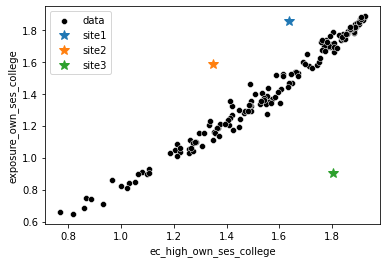

In [218]:
plot_centers_and_black_data(without_labels, (c1, c2, c3))

In [219]:
def get_cluster_number(dists):
    """identifies how many clusters are created"""
    return np.where(dists == np.min(dists))[0][0]

In [220]:
without_labels["dist1"] = c1.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["dist2"] = c2.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["dist3"] = c3.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["cluster"] = without_labels[["dist1", "dist2", "dist3"]].apply(get_cluster_number, axis=1)
without_labels["cluster"].value_counts()

1    77
0    68
2    14
Name: cluster, dtype: int64

##### If, after running the above cell, you do not get 3 different clusters, rerun all cells starting from the one under the Center class.

In [221]:
def plot_centers_and_colorized_data(without_labels, centers):
    """Plots each data point that is colorized based on the cluster site
    it was randomly assigned."""
    current_palette = sns.color_palette()[0:len(centers)]
    sns.scatterplot(data=without_labels, x="ec_high_own_ses_college", y="exposure_own_ses_college",
                    hue="cluster",
                    palette=current_palette)  
    for center in centers:
        plt.plot(center.coordinates[0], center.coordinates[1], '*', markersize=10)
    plt.xlabel('ec_high_own_ses_college')
    plt.ylabel('exposure_own_ses_college')
    legend_text = ['cluster' + str(i) for i in range(1, len(centers) + 1)]
    plt.legend(legend_text)

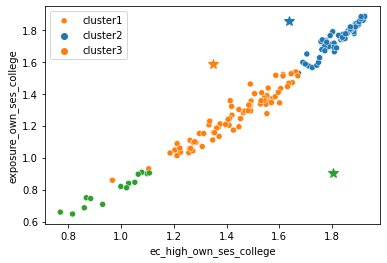

In [222]:
plot_centers_and_colorized_data(without_labels, (c1, c2, c3))

In [223]:
average_c1_length = np.mean(without_labels[without_labels["cluster"] == 0])["ec_high_own_ses_college"]
average_c1_width = np.mean(without_labels[without_labels["cluster"] == 0])["exposure_own_ses_college"]
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(without_labels[without_labels["cluster"] == 1])["ec_high_own_ses_college"]
average_c2_width = np.mean(without_labels[without_labels["cluster"] == 1])["exposure_own_ses_college"]
c2.coordinates = (average_c2_length, average_c2_width)

average_c3_length = np.mean(without_labels[without_labels["cluster"] == 2])["ec_high_own_ses_college"]
average_c3_width = np.mean(without_labels[without_labels["cluster"] == 2])["exposure_own_ses_college"]
c3.coordinates = (average_c3_length, average_c3_width)

average_c1_length, average_c1_width

(1.8315557308823525, 1.7550048514705883)

# **Mathematically Punitive**
##### The above `length` and `width` values are found by grouping all data points who are part of the same cluster we assigned earlier and taking their average value. We then assign the newly found averages to the coordinates of the 3 different clusters. For those of you interested in the most fun part, here is the formula expressed mathematically:
$$argmin \sum_{i=1}^{k}\sum_{x \in S_{i}}||x- \mu_{i}||^2 = argmin [dist(c_{i}, x)^2]$$

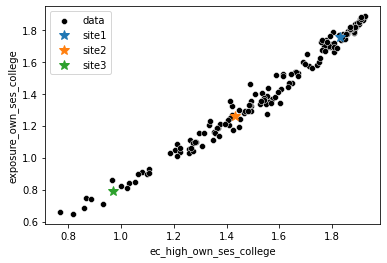

In [224]:
plot_centers_and_black_data(without_labels, (c1, c2, c3))

In [225]:
without_labels["dist1"] = c1.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["dist2"] = c2.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["dist3"] = c3.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["cluster"] = without_labels[["dist1", "dist2", "dist3"]].apply(get_cluster_number, axis = 1)

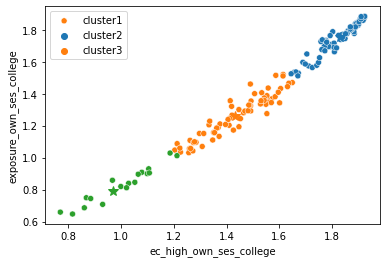

In [226]:
plot_centers_and_colorized_data(without_labels, (c1, c2, c3))

In [227]:
average_c1_length = np.mean(without_labels[without_labels["cluster"] == 0])["ec_high_own_ses_college"]
average_c1_width = np.mean(without_labels[without_labels["cluster"] == 0])["exposure_own_ses_college"]
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(without_labels[without_labels["cluster"] == 1])["ec_high_own_ses_college"]
average_c2_width = np.mean(without_labels[without_labels["cluster"] == 1])["exposure_own_ses_college"]
c2.coordinates = (average_c2_length, average_c2_width)

average_c3_length = np.mean(without_labels[without_labels["cluster"] == 2])["ec_high_own_ses_college"]
average_c3_width = np.mean(without_labels[without_labels["cluster"] == 2])["exposure_own_ses_college"]
c3.coordinates = (average_c3_length, average_c3_width)

average_c1_length, average_c1_width

(1.821977355555555, 1.74237875)

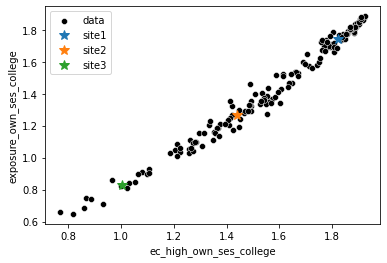

In [228]:
plot_centers_and_black_data(without_labels, (c1, c2, c3))

In [229]:
without_labels["dist1"] = c1.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["dist2"] = c2.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["dist3"] = c3.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["cluster"] = without_labels[["dist1", "dist2", "dist3"]].apply(get_cluster_number, axis = 1)

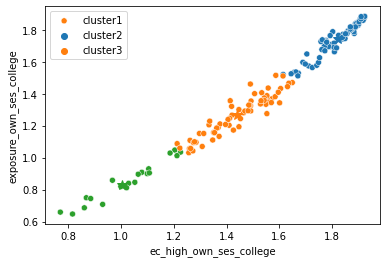

In [230]:
plot_centers_and_colorized_data(without_labels, (c1, c2, c3))

In [231]:
average_c1_length = np.mean(without_labels[without_labels["cluster"] == 0])["ec_high_own_ses_college"]
average_c1_width = np.mean(without_labels[without_labels["cluster"] == 0])["exposure_own_ses_college"]
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(without_labels[without_labels["cluster"] == 1])["ec_high_own_ses_college"]
average_c2_width = np.mean(without_labels[without_labels["cluster"] == 1])["exposure_own_ses_college"]
c2.coordinates = (average_c2_length, average_c2_width)

average_c3_length = np.mean(without_labels[without_labels["cluster"] == 2])["ec_high_own_ses_college"]
average_c3_width = np.mean(without_labels[without_labels["cluster"] == 2])["exposure_own_ses_college"]
c3.coordinates = (average_c3_length, average_c3_width)

average_c1_length, average_c1_width

(1.8191369808219178, 1.7393475342465754)

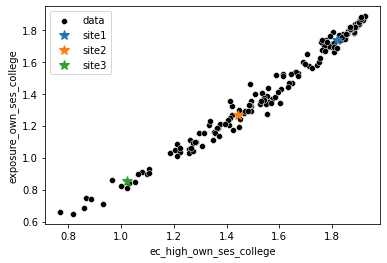

In [232]:
plot_centers_and_black_data(without_labels, (c1, c2, c3))

In [233]:
without_labels["dist1"] = c1.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["dist2"] = c2.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["dist3"] = c3.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["cluster"] = without_labels[["dist1", "dist2", "dist3"]].apply(get_cluster_number, axis = 1)

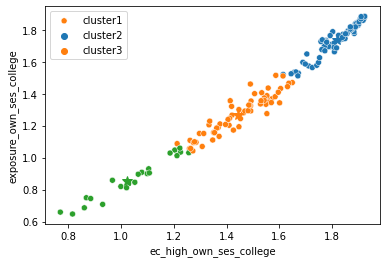

In [234]:
plot_centers_and_colorized_data(without_labels, (c1, c2, c3))

In [235]:
average_c1_length = np.mean(without_labels[without_labels["cluster"] == 0])["ec_high_own_ses_college"]
average_c1_width = np.mean(without_labels[without_labels["cluster"] == 0])["exposure_own_ses_college"]
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(without_labels[without_labels["cluster"] == 1])["ec_high_own_ses_college"]
average_c2_width = np.mean(without_labels[without_labels["cluster"] == 1])["exposure_own_ses_college"]
c2.coordinates = (average_c2_length, average_c2_width)

average_c3_length = np.mean(without_labels[without_labels["cluster"] == 2])["ec_high_own_ses_college"]
average_c3_width = np.mean(without_labels[without_labels["cluster"] == 2])["exposure_own_ses_college"]
c3.coordinates = (average_c3_length, average_c3_width)

average_c1_length, average_c1_width

(1.8191369808219178, 1.7393475342465754)

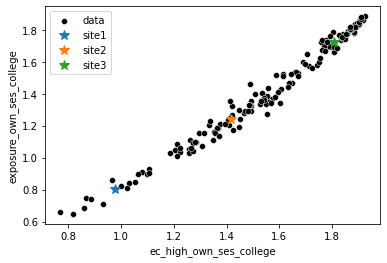

In [47]:
plot_centers_and_black_data(without_labels, (c1, c2, c3))

In [48]:
without_labels["dist1"] = c1.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["dist2"] = c2.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["dist3"] = c3.dist(without_labels[["ec_high_own_ses_college", "exposure_own_ses_college"]])
without_labels["cluster"] = without_labels[["dist1", "dist2", "dist3"]].apply(get_cluster_number, axis = 1)

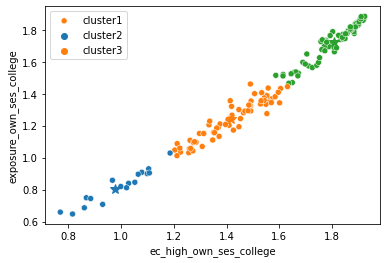

In [49]:
plot_centers_and_colorized_data(without_labels, (c1, c2, c3))

##### Notice how the graphs as well as their average `length` and `width` values virtually stop changing. We can conclude here. To reiterate what we did:
1. Randomly select three different cluster sites.
2. Assign each data point to one of these three cluster sites, creating clusters by mathematically calculating the euclidean distance.
3. Repeat these steps until the cluster sites stop changing and clustering variation is minimized.

# **Agglomerative Clustering** 
##### This method of clustering starts off by treating each individual data point as it's own cluster. The algorithm then combines clusters that are similar together until one larger cluster is formed. Run the code below to see the difference. It may be subtle, but look closely at the clusters and points they contain!

In [50]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 3, linkage='ward')
model.fit(without_labels.loc[:, ['ec_high_own_ses_college', 'exposure_own_ses_college']])
label = model.labels_

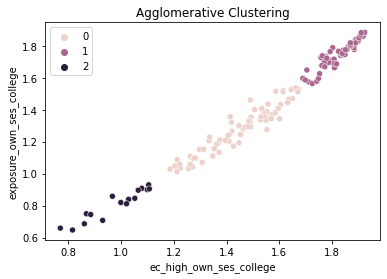

In [51]:
sns.scatterplot(data=without_labels, x='ec_high_own_ses_college', y='exposure_own_ses_college', hue=model.labels_).set_title('Agglomerative Clustering');

In [1]:
# second model here

## Interpretation and Conclusions (20 points)
In this section you must relate your modeling and forecasting results to your original prediction question.  You must:
1. Address an economic question.  What do the answers mean? What advice would you give a decision maker on the basis of your results?  How might they allocate their resources differently or change their decisions with the results of your model?  Why should the reader care about your results?
2. Discuss caveats and / or reasons your results might be flawed.  No model is perfect, and understanding a model's imperfections is extremely important for the purpose of knowing how to interpret your results.  Often, we know the model output is wrong but we can assign a direction for its bias.  This helps to understand whether or not your answers are conservative.  

Shoot for 500 words for this section.

## Post-Analysis Reproducibility (10 points)

You will need to make sure that your code can be run by another team and by us.  This will mean making sure that all steps run in sequence, and hopefully that all the datasets are easily read via file paths.

We are anticipating that the easiest way to share will be via Google Colab. You are welcome to work on Datahub, on your local install, or any way you like.  However you will be expected to make sure that your complete notebook can run on Colab at the end of the project.  Please keep this in mind and save time to fiddle with things so it works!


Please share your Google Colab (or equivalent) link in this [sheet](https://docs.google.com/spreadsheets/d/15oNmFwpjSHifnyPvJJ8Gv3ECNOPKHsIWvvt0EbkyXVU/edit?usp=sharing). Each group will be assigned another group's link randomly (in the same sheet) to review and run without issues. Please confirm and leave comments about issues about this in the sheet as well.

This part is to ensure that we're building replicable and reusable code. Please refer to [section 9](https://docs.google.com/presentation/d/12eIuPKYZ8PMysm0pSxoClnh4YOQFRqHO6qVv2SN23Xc/edit?usp=share_link) for best practices of this.

## Clarity, Style and Presentation (5 points)
**(delete this markdown cell in your final submission)**

The notebook should tell the story of your modeling and learning experience. Think about the overall arc of your project and use the notebook to explain the most important aspects of your thinking and what you’ve learned.  Make time to take a step back from the individual parts of the notebook to think about how it flows as a complete document.
 
 
Markdown cells, not code cells, are where you convey your thinking and methodology.
 - We won’t read your code cells to understand your thinking or methods
 - We will only use your code cells to verify your workflow
 
Less is more when it comes to code output and visualizations. Any output should serve a purpose for the reader of the notebook, and you should make that purpose clear in your markdown cells.  For example:
 - Don’t display every line of a dataframe; use `.head()` or printouts of specific parts of a dataframe judiciously. Display contents of a dataframe when you want to show the reader something specific, and explain your thinking in a markdown cell.
 - Use visualizations to tell your story, but make sure you explain in markdown cells what’s important about your visualizations. If you can’t tell the reader what’s important about the visualization, leave it out!
- Suppress output of functions unless it is crucial to explain your thinking and demonstrate your workflow.
- Generally, the notebook should not contain copious amounts of data, function outputs, plots. Think of your notebook as a giant function with a `verbose` argument… where want verbose = FALSE.